> ### EEE3314: Introduction to Artificial Intelligence

# Assignment \# II:  Bias-variance tradeoff

### *Assignement Instructions:*
- **Due date**: 11 PM, Oct. 1, 2021
- **File name**: ID_Name_HW2.ipynb
- Write a program implementing a particular algorithm to solve a given problem.   
- **Analyze the algorithm, theoretically and empirically. Report and discuss your results.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.**
We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by yourself so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework.
- Signiture: <span style="color:blue">[2017142047] [한민규]</span>

In [ ]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-09-28 14:57:43.870952


## Problem statement

Let's suppose that we have a single test set $T$ and training sets, $D_j$ ($j=1, \dots, N)$, where $N$(=100) is a number of training sets. We denote by $(x^i_j, y^i_j)$ training samples in each set $D_j$, where $i=1,\dots, M$ and $M(=50)$ is the number of samples. We denote by $(x^i, y^i)$ test samples, where $i=1,\dots, K$, and $K(=100)$ is the number of samples.

Assume that training and test sets are obtained(sampled) from a true function $f_{\text{true}}$, for the purpose of simulating the bias-variance tradeoff only. Specifically, the training sample $y^i_j$ is obtained by adding noise to the true function $f_{\text{true}}$ as follows: $y^i_j = f_{\text{true}}(x^i_j) + \epsilon $, where $\epsilon$ is the Gaussian noise with mean 0 and variance 1. The test sample $y^i$ is directly sampled from the true function $f_{\text{true}}$ without degradation, in order to discard the influence of noise, as follows: $y^i = f_{\text{true}}(x^i)$.



Let's suppose that we use polynomial regression for prediction. We denote by $f_{j}^k$ a set of functions (models) for each dataset $D_j$, obtained with the degree of polynomial functions, $k$ (i.e., model complexity). For individual polynomial models $f_{j}^k$, we will finally calculate expectations of mean-squared-error (MSE) on test samples, over different training sets $D_j$, that is, compute expected prediction error using test samples, as follows:

\begin{equation}
E_{D}[(f_{true}(x) - f_{D}(x))^2].
\end{equation}


**Note**:
You can use ```average```, ```transpose```, ```dot``` operators, ```concatenate```, ```min``` and ```max``` provided by ```Numpy```. For this week, you can also use ```sklearn.linear_model.LinearRegression``` and ```sklearn.preprocessing.PolynomialFeatures``` . You will get no credit otherwise. 
    

### P1. Assessing performance (60 points)

Let's simulate effect of model complexity on the performance (e.g., training and test errors).

P1.1 Write the ```mse``` function which returns MSE between targets (observations) and predictions (*5 points*).  

P1.2 Write the ```bias``` function which returns average squared bias of predictions. (*10 points*).  

P1.3 Write the ```variance``` function which returns average variance of predictions. (*10 points*).  

P1.4 Write the ```assessing_performance``` function using the following code structure (*35 points*).


For each **degree of polynomial functions** $k$:
> For each **training set $D_j (j=1, \dots, N)$**: 
>>* Estimate the model $f_{j}^k$ using the ```regression``` function.
>>* Calculate MSEs for the training and test sets, and store them to lists respectively. Use the ```predict``` and ```mse``` functions. 
>
>* For each polynomial degree, store all predictions of a set of functions $f_{j}^k$ on test samples to a dictonary with the degree as a key.
>* For each polynomial degree, calculate the average MSEs for traning and test sets using a set of functions $f_{j}^k$, and store them to dictionaries using the degree as a key, separately. Note that the average MSE for the test set is the expected prediction error.
>* For each polynomial degree, calculate the average squared bias of predictions, and store it to a dictionary using the degree as a key. Use the ```bias``` function.
>* For each polynomial degree, calculate the average variance of predictions, and store it to a dictionary using the degree as a key. Use the ```variance``` function.

Return 5 dictionaries

### P2. Visualization (20 points)

P2.1 Plot the average MSEs for training and test sets, and average squared bias and variance w.r.t the degree of polynomial. Write the ```plot_comparison``` function (*10  points*)   

P2.2 For each degree of polynomal function, plot predictions for the models $f_j^k$ on the test set and their average. Also plot the true function $f_{\text{true}}$ for comparison. Write the ```plot_models``` function. (*10 points*) 
> **Plot configuration**
> * Scatter plots of predictions &rarr; ```alpha=0.2, color='silver'```
> * Scatter plots of average predictions &rarr; ```color='lightsalmon'```
> * Line plot of true model &rarr; ```color='red', linewidth=3.0```
  
  



## Results

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from project2 import *

import pandas as pd

### Prepare datasets

In [ ]:
f_true = lambda x : (x-1)**3 
x_range = 3

X_train_set, y_train_set, X_test, y_test = prepare_data(f_true, x_range)

### Visualizing The Dataset

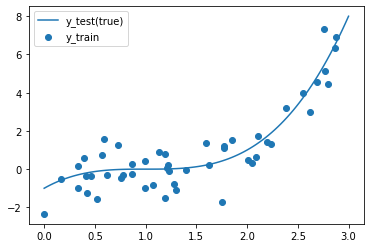

In [ ]:
plt.scatter(X_train_set[-1], y_train_set[-1], label='y_train')
plt.plot(X_test, y_test, label='y_test(true)')
plt.legend()

### P1

In [ ]:
models = ["Deg. 0", "Deg. 1", "Deg. 2", "Deg. 3", "Deg. 5", "Deg. 7", "Deg. 9"]

In [ ]:
y_pred_comparison, train_mse_comparison, test_mse_comparison, bias_comparison, variance_comparison = assessing_performance(X_train_set, y_train_set, X_test, y_test, models)

### P2

Plot the predictions of functions $f_{N}^k$ by varying the degree of polynomial.

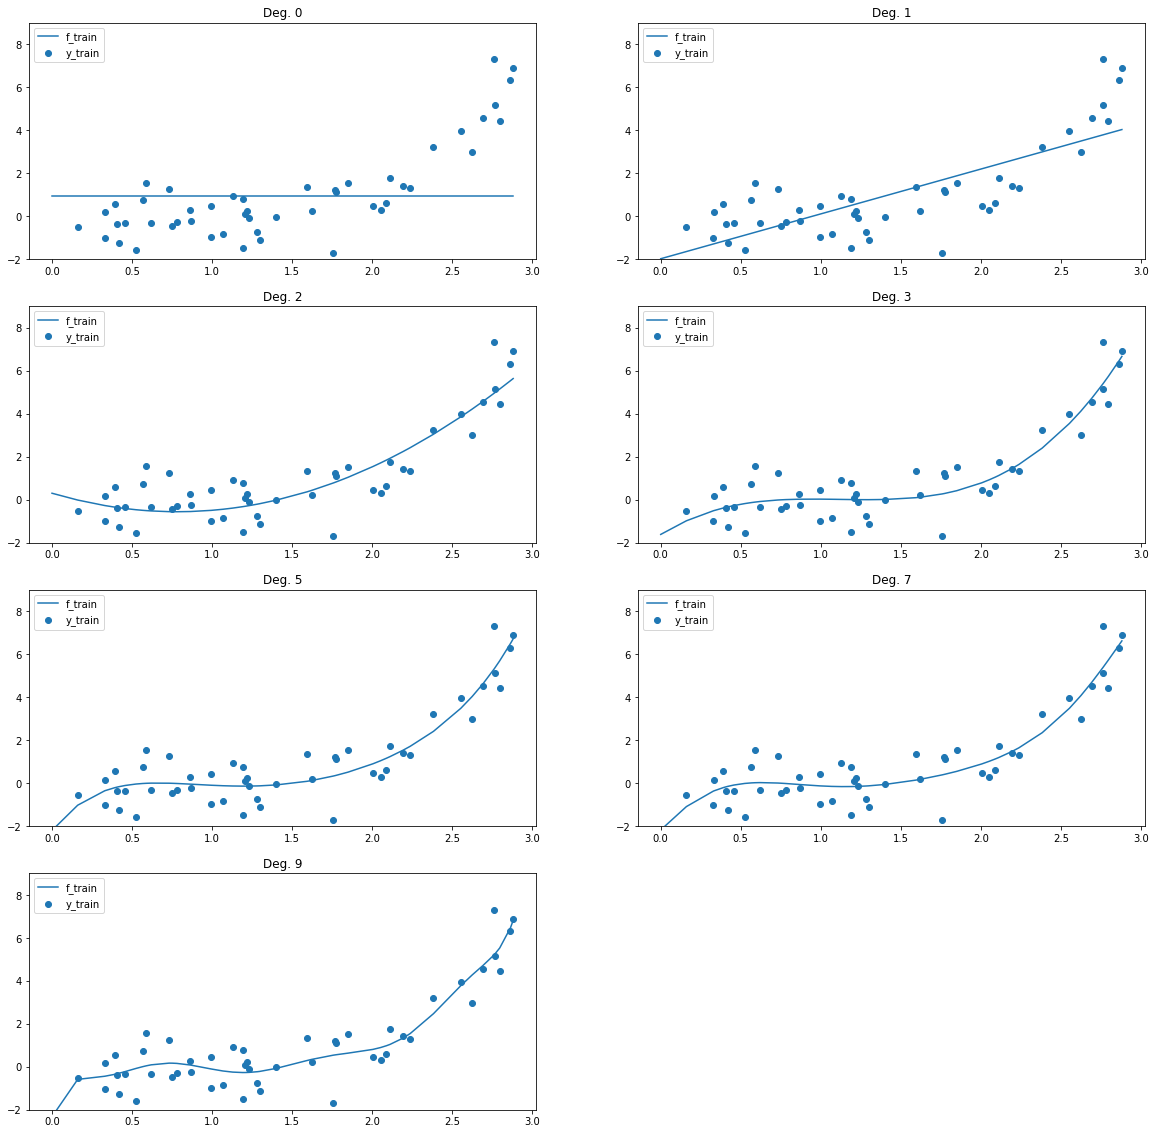

In [ ]:
num_model = len(models)
fig = plt.figure(figsize=(20,20))
X_train = X_train_set[-1]
y_train = y_train_set[-1]
for i in range(num_model):
    degree = int(models[i].split()[1])
    L = regression(X_train, y_train, degree)
    y_pred = predict(X_train, L, degree)
    
    plt.subplot((num_model + 1)//2, 2, i+1)
    plt.scatter(X_train_set[-1], y_train_set[-1], label='y_train')
    plt.plot(X_train_set[-1], y_pred, label='f_train')
    plt.ylim(-2, 9)
    plt.legend()
    plt.title(models[i])

### P2.1

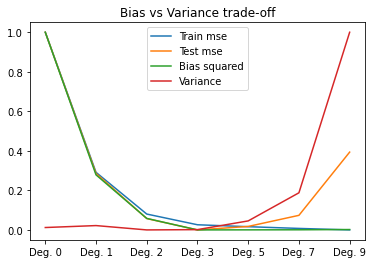

In [ ]:
plot_comparison(train_mse_comparison, test_mse_comparison, bias_comparison, variance_comparison)

In [ ]:
categories=['Train mse', 'Test mse', 'Bias squared', 'Variance']
make_table(categories, train_mse_comparison, test_mse_comparison, bias_comparison, variance_comparison)

,Train mse,Test mse,Bias squared,Variance
Deg. 0,5.562503,4.911613,4.791710,0.119903
Deg. 1,2.209799,1.473882,1.335414,0.138468
Deg. 2,1.211446,0.377035,0.279951,0.097085
Deg. 3,0.955068,0.101014,0.001191,0.099822
Deg. 5,0.908583,0.185761,0.002638,0.183124
Deg. 7,0.867516,0.455790,0.004305,0.451485
Deg. 9,0.831693,1.994603,0.010512,1.984091


### P2.2

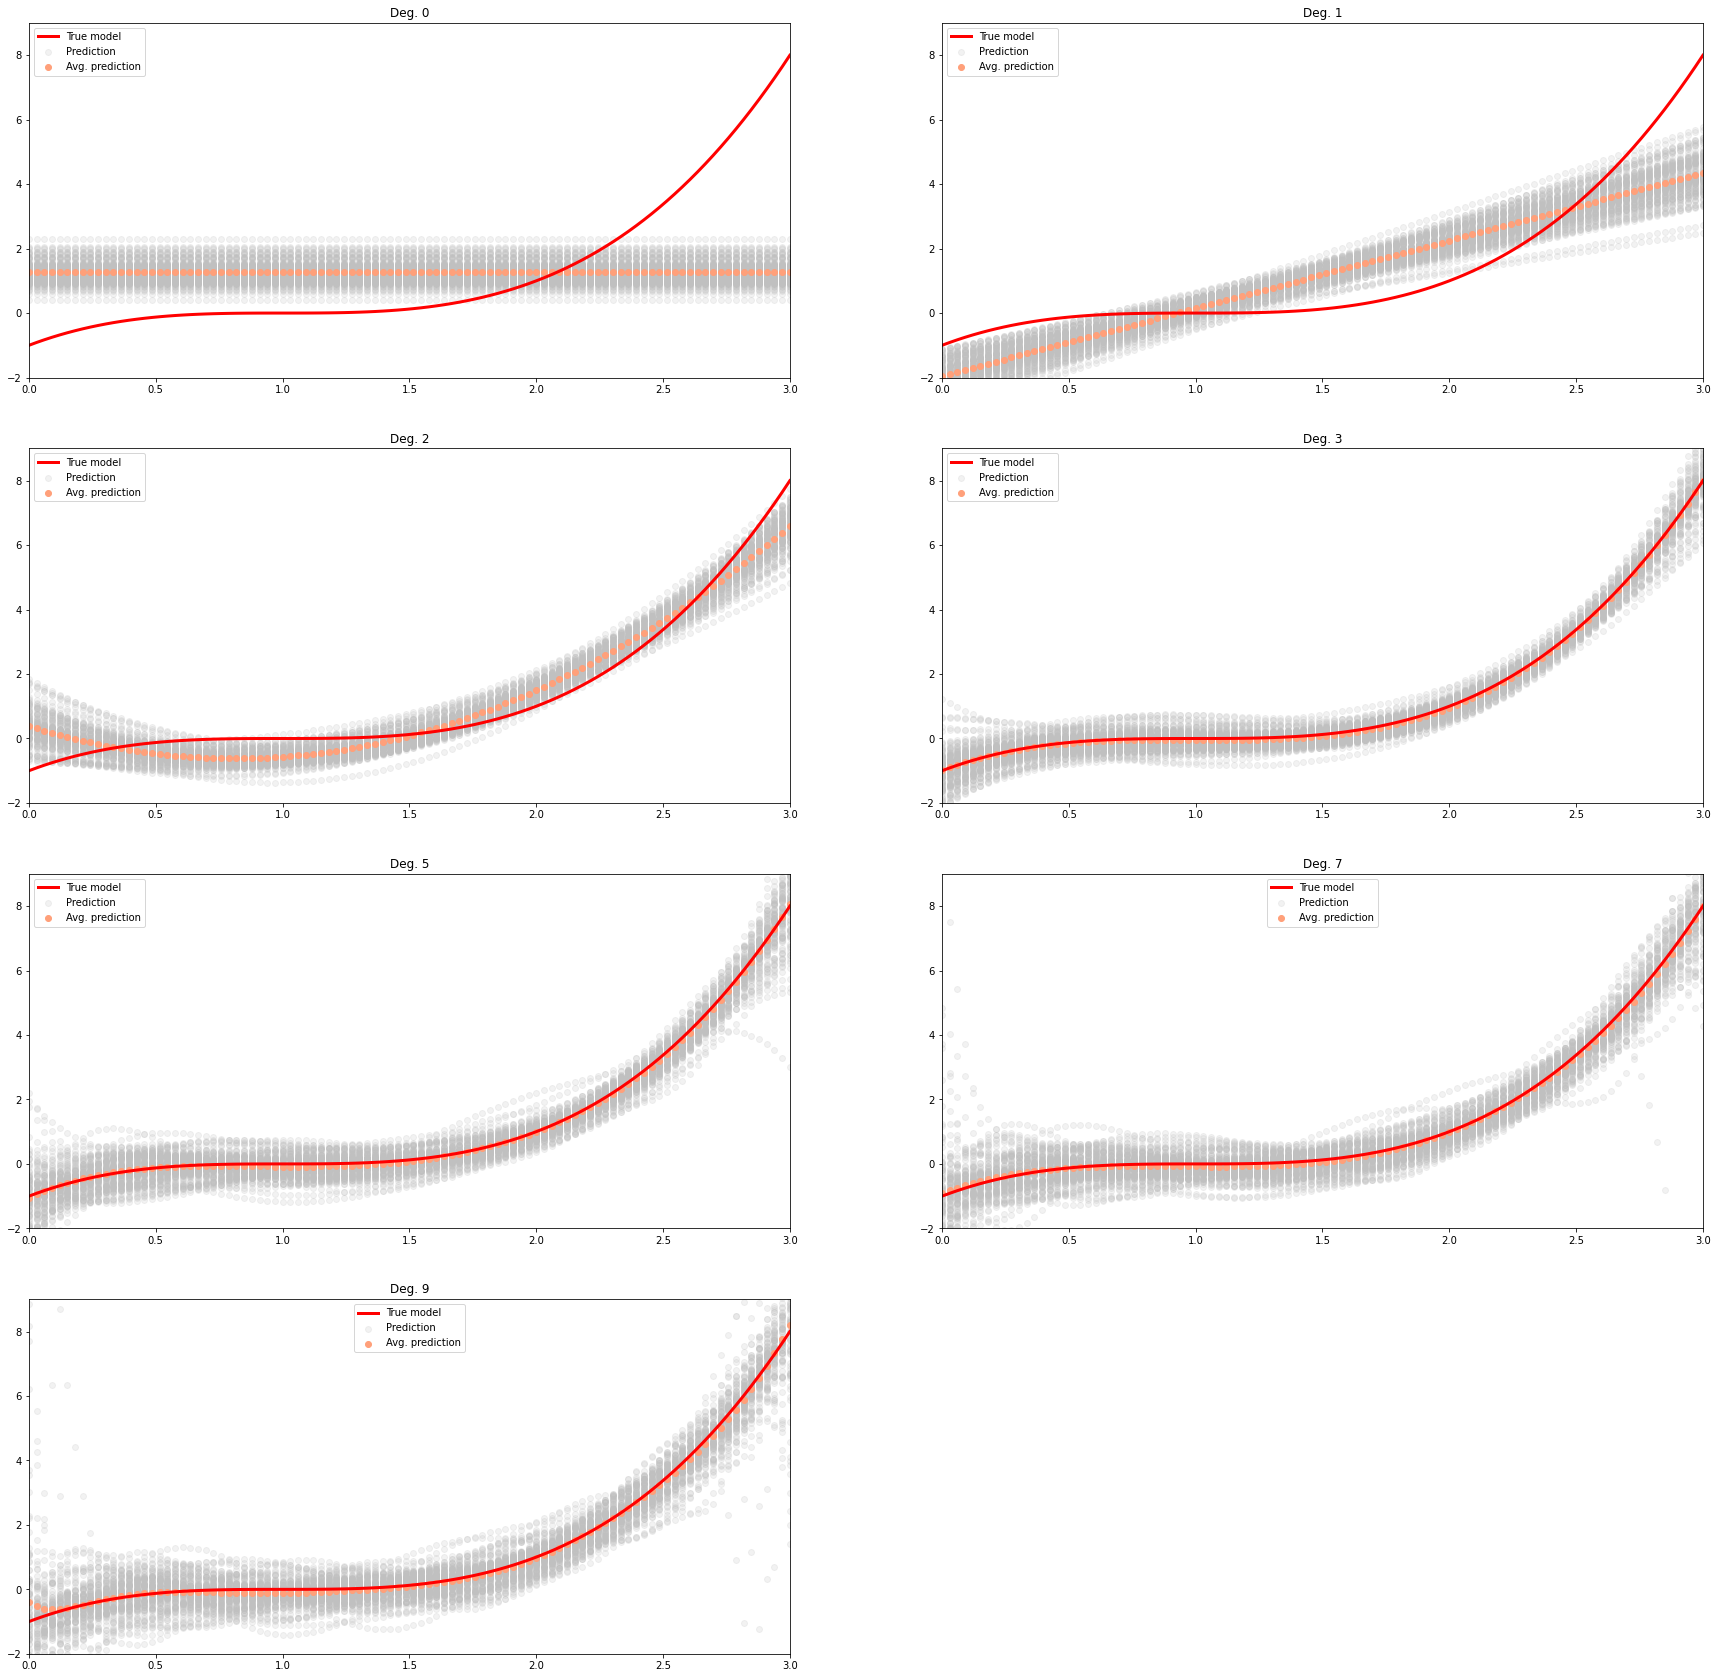

In [ ]:
plot_models(models, X_test, y_test, y_pred_comparison)

Plot the error beteween predictions of a set of functions $f_j^k$ and true values. 

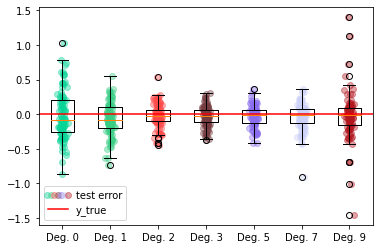

In [ ]:
plot_box_prediction_error(models, X_test, y_test, y_pred_comparison)


## Analysis and discussion (20 points)

Your answer must include.....

- Analysis of results from P1 and P2.
- Analysis of bias and variance according to model complexity.
    

For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).



*   Analysis of results from P1 and P2.
 - P1에서 assessing_performance함수를 작성하는 과정에서 error의 sources인 mse, bias, variance에 대해 코드로 구현해봄으로써 MSE(Mean Squared Error)는 예측값과 목표값 사이의 차이, bias는 예측된 결과의 평균과 실제값 사이의 차이를 나타낸 수치, variance는  예측값과 예측값 사이의 차이를 나타낸 수치의 뜻을 더 잘 이해하였고 파악할 수 있었다. 
 - 또한, 결과를 통해 5개의 dictionary가 잘 생성되었음을 P2의 plot과 table에서 알 수 있다. P2.1에서 Plot과 table을 통해 Test mse가 bias squared와 variance의 합인 것을 확인 할 수 있다. 이를 통해 이론적으로 error가 $Bias^2 + Variance$ 이므로 함수의 구현을 통해 이론을 확인할 수 있었다. 
 - Train mse는 degree가 증가함에 따라 계속 감소하는 것에 반해 bias는 degree가 3까지 감소한 후 가장 작고, 그 이후부터는 증가하는 것을 확인할 수 있다. 이를 통해 도출해 낸 결과는 degree가 3일 때 sweet point에 가장 가깝다고 할 수 있으며 degree가 3보다 작을 때는 under fitting, 3보다 클 때는  over fitting되었다고 할 수 있다. 또한 이를 통해 bias와 variance는 trade-off 관계인 것을 확인할 수 있다.
*   Analysis of bias and variance according to model complexity.
 - P2.2에서 AVG Prediction은 degree 3부터 true model과 잘 맞음을 알 수 있다. 하지만 degree가 커짐에 따라 각각의 prediction의 분포가 매우 커지는 것을 확인할 수 있다. 이는 model complexity(degree)가 증가함에 따라 bias는 감소하고, variance는 증가하는 것임을 알려준다.
 - true function이 degree가 3이므로 예측을 통해 얻어지는 error가 degree가 3일 때 가장 작은 것이 이상적이다. 이는 마지막 plot에서 확연하게 알 수 있다. 
